In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

C:\Users\yang\Anaconda3\envs\python_2_7\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Users\yang\Anaconda3\envs\python_2_7\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\yang\Anaconda3\envs\python_2_7\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module inst

In [2]:
df = sm.datasets.fair.load_pandas().data

In [6]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
def affair_check(x) : 
    if x != 0 :
        return 1
    else : 
        return 0

In [8]:
df['Had_affir'] = df['affairs'].apply(affair_check)

In [9]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_affir
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [10]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_affir
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [13]:
df.groupby('Had_affir').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_affir,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


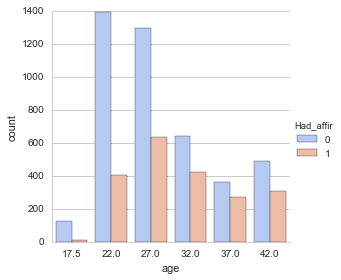

In [15]:
sns.factorplot('age',data=df,kind='count',hue='Had_affir',palette='coolwarm')

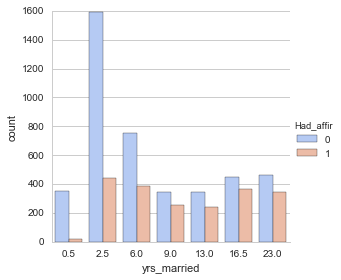

In [16]:
sns.factorplot('yrs_married',data=df, kind='count',hue='Had_affir',palette='coolwarm')

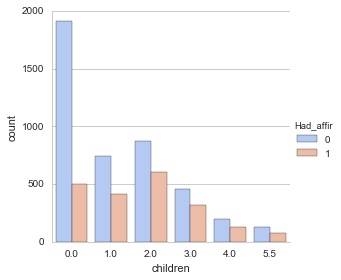

In [17]:
sns.factorplot('children',data=df, kind='count',hue='Had_affir',palette='coolwarm')

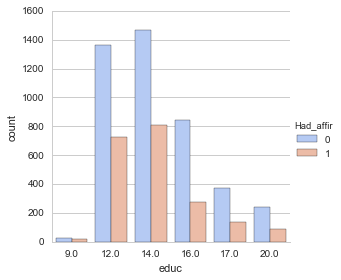

In [18]:
sns.factorplot('educ',data=df, kind='count',hue='Had_affir',palette='coolwarm')

In [19]:
occ_dummies = pd.get_dummies(df['occupation'])


In [20]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [21]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [22]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [23]:
hus_occ_dummies.columns = ['hucc1','hucc2','hucc3','hucc4','hucc5','hucc6']

In [24]:
X = df.drop(['occupation','occupation_husb','Had_affir'],axis=1)

In [26]:
dummies = pd.concat([occ_dummies, hus_occ_dummies],axis=1)

In [28]:
X = pd.concat([X,dummies],axis =1)

In [30]:
Y = df.Had_affir

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_affir, dtype: int64

In [31]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_affir, dtype: int64

# 4th lession Video

In [32]:
# Multicollinearity

In [34]:
X = X.drop('occ1',axis=1)

In [35]:
X = X.drop('hucc1',axis=1)

In [36]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hucc2,hucc3,hucc4,hucc5,hucc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [37]:
X = X.drop('affairs',axis=1)

In [38]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hucc2,hucc3,hucc4,hucc5,hucc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [40]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_affir, dtype: int64

In [41]:
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [42]:
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

0.7260446120012567

In [43]:
Y.mean()

0.32249450204209867

In [44]:
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [45]:
coeff_df

,0,1
0,rate_marriage,[-0.697739059886]
1,age,[-0.0563288288984]
2,yrs_married,[0.10385314021]
3,children,[0.0181065514319]
4,religious,[-0.367989804501]
5,educ,[0.00903265215475]
6,occ2,[0.293794460891]
7,occ3,[0.604550357498]
8,occ4,[0.341838610233]
9,occ5,[0.938970992407]


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [47]:
train_test_split

<function sklearn.cross_validation.train_test_split>

In [50]:
log_model2 = LogisticRegression()

log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
class_predict = log_model2.predict(X_test)

In [52]:
print metrics.accuracy_score(Y_test,class_predict)

0.741206030151
